# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [25]:
# Check for missing values
print("\n Missing Values:\n", df.isnull().sum())

# Display summary statistics
print("\n Summary Statistics:\n", df.describe())




 Missing Values:
 sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

 Summary Statistics:
            sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.14

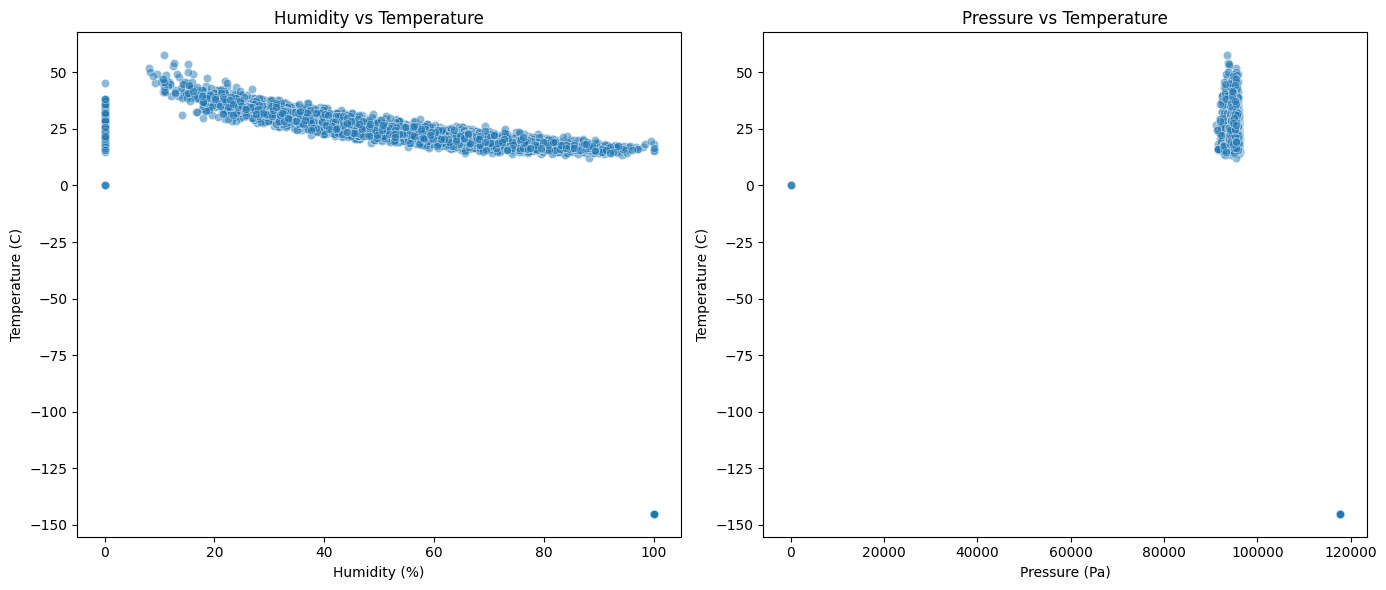

In [26]:
# Scatter plot to observe relationship
sample_df = df.sample(n=5000, random_state=42)
plt.figure(figsize=(14, 6))

# Humidity vs Temperature
plt.subplot(1,2,1)
sns.scatterplot(data=sample_df, x='humidity', y='temperature', alpha=0.5)
plt.title('Humidity vs Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (C)')

# Pressure vs temperature
plt.subplot(1,2,2)
sns.scatterplot(data=sample_df, x="pressure", y="temperature", alpha=0.5)
plt.title('Pressure vs Temperature')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Temperature (C)')

plt.tight_layout()
plt.show()


## Data Preprocessing

In [27]:
# Drop any rows with missing values
df = df.dropna()

# Define features and target
X = df[['humidity', 'pressure']]
y = df['temperature']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [28]:
# Linear Regression
model= LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)


## Evaluation


In [29]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared score: {r2:.4f}")


Mean Squared Error: 99.58
R-squared score: 0.4865


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.



[Polynomial Regression]
Mean Squared Error: 19.70
R-squared score: 0.8984


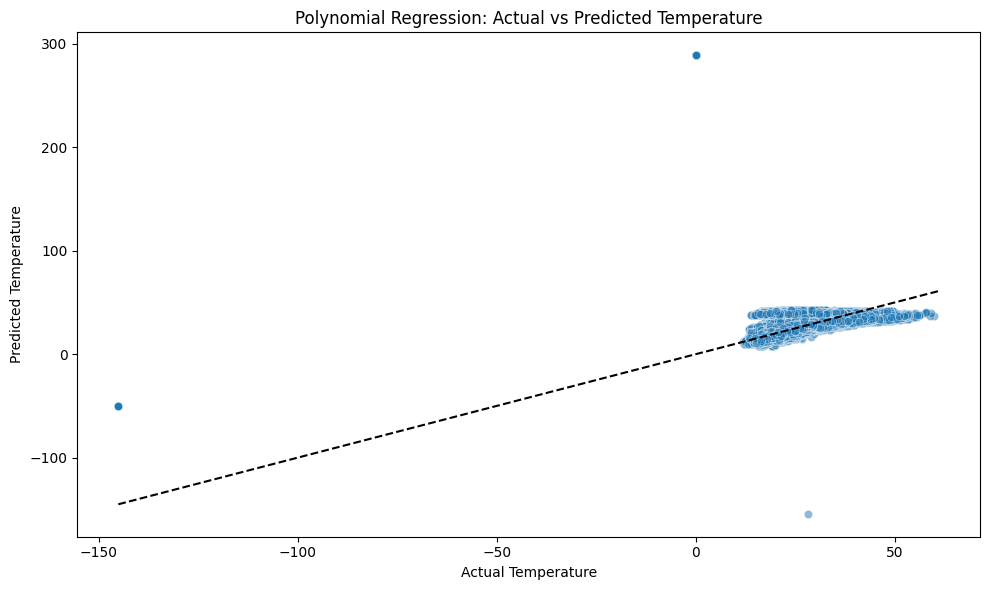

In [30]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Create a polynomial modelpipeline (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Train Polynomial model
poly_model.fit(x_train, y_train)
#Predict using polynomial model
y_poly_pred = poly_model.predict(x_test)
# Evaluate polynomial model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"\n[Polynomial Regression]")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared score: {r2_poly:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title("Polynomial Regression: Actual vs Predicted Temperature")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.tight_layout()
plt.show()